In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns; sns.set()
import math

In [16]:
from sklearn.svm import LinearSVC, SVC, SVR, LinearSVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [4]:
data_wine = pd.read_csv('data_files/wine.csv')

In [5]:
data_wine_x = data_wine.iloc[:,:-1]

In [6]:
data_wine_y = data_wine.iloc[:,-1:]

In [7]:
data_wine_x_2 = pd.concat([data_wine.iloc[:,:-5],data_wine.iloc[:,-4:]],axis=1,sort=False)
data_wine_y_2 = data_wine.iloc[:,-5]

In [8]:
#data_wine_y_2 = data_wine_y_2.values

In [9]:
data_wine_y_2.head()

0    5.64
1    4.38
2    5.68
3    7.80
4    4.32
Name: Color_Intensity, dtype: float64

In [10]:
def cross_validate_svm(cv,data_x,data_y,depth=None,model_type='Classifier',random=None):
    scores_train= []
    scores_test= []

    acc_train = []
    acc_test = []
    #auc_train = []
    #auc_test = []
    
    y_pred_train = []
    y_pred_test = []
    mse_train = []
    rmse_train = []
    mse_test = []
    rmse_test = []
    mae_train = []
    rmae_train = []
    mae_test = []
    rmae_test = []
    
    for train_idx, test_idx in cv.split(data_x):
        X_train, X_test = data_x.iloc[train_idx], data_x.iloc[test_idx] 
        y_train, y_test = data_y.iloc[train_idx], data_y.iloc[test_idx]
        if model_type=='Classifier':
            model = SVC(kernel='rbf', gamma='auto', C=1.0, cache_size=1000)
            model.fit(X_train,y_train)
            y_pred_train = model.predict(X_train)
            y_pred_test = model.predict(X_test)
            acc_test.append(accuracy_score(y_test, y_pred_test))
            acc_train.append(accuracy_score(y_train, y_pred_train))
        if model_type=='LinearClassifier':
            model = LinearSVC(penalty='l2', C=1.0)
            model.fit(X_train,y_train)
            y_pred_train = model.predict(X_train)
            y_pred_test = model.predict(X_test)
            acc_test.append(accuracy_score(y_test, y_pred_test))
            acc_train.append(accuracy_score(y_train, y_pred_train))
        if model_type=='Regressor':
            model = SVR(kernel='rbf',gamma='auto', C=1.0, epsilon=0.2)
            model.fit(X_train,y_train)
            y_pred_train = model.predict(X_train)
            y_pred_test = model.predict(X_test)
            scores_test.append(model.score(X_test,y_test))
            scores_train.append(model.score(X_train,y_train))
            mse_train.append(metrics.mean_squared_error(y_train,y_pred_train))
            rmse_train.append(math.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))
            mse_test.append(metrics.mean_squared_error(y_test,y_pred_test))
            rmse_test.append(math.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))
            mae_train.append(metrics.mean_absolute_error(y_train,y_pred_train))
            rmae_train.append(math.sqrt(metrics.mean_absolute_error(y_train,y_pred_train)))
            mae_test.append(metrics.mean_absolute_error(y_test,y_pred_test))
            rmae_test.append(math.sqrt(metrics.mean_absolute_error(y_test,y_pred_test)))
        if model_type=='LinearRegressor':
            model = LinearSVR(tol=1e-5, epsilon=0.1, C=1.0)
            model.fit(X_train,y_train)
            y_pred_train = model.predict(X_train)
            y_pred_test = model.predict(X_test)
            scores_test.append(model.score(X_test,y_test))
            scores_train.append(model.score(X_train,y_train))
            rmse_train.append(math.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))
            mse_test.append(metrics.mean_squared_error(y_test,y_pred_test))
            rmse_test.append(math.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))
            mae_train.append(metrics.mean_absolute_error(y_train,y_pred_train))
            rmae_train.append(math.sqrt(metrics.mean_absolute_error(y_train,y_pred_train)))
            mae_test.append(metrics.mean_absolute_error(y_test,y_pred_test))
            rmae_test.append(math.sqrt(metrics.mean_absolute_error(y_test,y_pred_test)))
        

    if model_type=='Classifier' or model_type=='LinearClassifier':
        print("TRAIN :")
        print('Accuracy List Train: ', acc_train)
        print('Accuracy Mean', np.mean(acc_train))
        print("TEST :")
        print('Accuracy List Train: ', acc_test)
        print('Accuracy Mean', np.mean(acc_test))
    else:
        print("TEST :")
        #print('R2 Test: ', scores_test)
        print('Media R2 Test Set: ',np.mean(scores_test))
        #print('MSE Test: ', mse_test)
        print("Mean MSE: ", np.mean(mse_test))
        print("Root Mean MSE: ", math.sqrt(np.mean(mse_test)))
        print("New RMSE: ", np.mean(rmse_test))
        #print('MAE Test: ', mae_test)
        print("Mean MAE: ", np.mean(mae_test))
        print("Root Mean MAE: ", math.sqrt(np.mean(mae_test)))
        print("New RMAE: ", np.mean(rmae_test))

        print("\n")

        print("TRAIN :")
        #print('R2 Train: ',scores_train)
        print('Media R2 Train Set: ',np.mean(scores_train))
        #print('MSE Train: ', mse_train)
        print("Mean MSE: ", np.mean(mse_train))
        print("Root Mean MSE: ", math.sqrt(np.mean(mse_train)))
        print("New RMSE: ", np.mean(rmse_train))
        #print('MAE Train: ', mae_train)
        print("Mean MAE: ", np.mean(mae_train))
        print("Root Mean MAE: ", math.sqrt(np.mean(mae_train)))
        print("New RMAE: ", np.mean(rmae_train))

In [12]:
def rmse(estimator, X, y):
    y_pred = estimator.predict(X)
    return math.sqrt(mean_squared_error(y,y_pred))

def rmae(estimator, X, y):
    y_pred = estimator.predict(X)
    return math.sqrt(mean_absolute_error(y,y_pred))

In [17]:
kf = KFold(n_splits=10,shuffle=True,random_state=0)


cross_validate_svm(kf,data_wine_x_2,data_wine_y_2,model_type='Regressor')
#cross_validate_svm(kf,data_wine_x,data_wine_y,model_type='Classifier')

model = SVR(kernel='rbf',gamma='auto', C=1.0, epsilon=0.2)
#model = SVC(kernel='rbf', gamma='auto', C=1.0)

print("\n")
print("CVScore RMSE (Test): ",np.mean(cross_val_score(model, data_wine_x_2, data_wine_y_2, cv=kf, scoring=rmse)))
print("CVScore RMAE (Test): ",np.mean(cross_val_score(model, data_wine_x_2, data_wine_y_2, cv=kf, scoring=rmae)))
print("\n")

cvalidate_rmse = cross_validate(model,data_wine_x_2,data_wine_y_2,cv=kf,scoring=rmse, return_train_score=True)
print(sorted(cvalidate_rmse.keys()))
print("Train RMSE: ",np.mean(cvalidate_rmse['train_score']))
print("Test RMSE: ",np.mean(cvalidate_rmse['test_score']))
print("\n")
cvalidate_rmae = cross_validate(model,data_wine_x_2,data_wine_y_2,cv=kf,scoring=rmae, return_train_score=True)
print(sorted(cvalidate_rmae.keys()))
print("Train RMAE: ",np.mean(cvalidate_rmae['train_score']))
print("Test RMAE: ",np.mean(cvalidate_rmae['test_score']))
#np.mean(cross_val_score(model, data_wine_x, data_wine_y, cv=kf)) #Classifier 
#np.mean(cross_val_score(model, data_wine_x_2, data_wine_y_2, cv=kf)) #Regressor

TEST :
Media R2 Test Set:  -0.030803642452865477
Mean MSE:  5.383042099401068
Root Mean MSE:  2.3201383793647024
New RMSE:  2.274547141505777
Mean MAE:  1.8000431574305793
Root Mean MAE:  1.3416568702282188
New RMAE:  1.332723924415441


TRAIN :
Media R2 Train Set:  0.498451792563153
Mean MSE:  2.681521241491924
Root Mean MSE:  1.6375351115294976
New RMSE:  1.6367945124241772
Mean MAE:  1.0320740188128066
Root Mean MAE:  1.015910438381655
New RMAE:  1.015772560277665


CVScore RMSE (Test):  2.274547141505777
CVScore RMAE (Test):  1.332723924415441


['fit_time', 'score_time', 'test_score', 'train_score']
Train RMSE:  1.6367945124241772
Test RMSE:  2.274547141505777


['fit_time', 'score_time', 'test_score', 'train_score']
Train RMAE:  1.015772560277665
Test RMAE:  1.332723924415441


In [46]:
model.fit(data_wine_x_2,data_wine_y_2)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [78]:
targets = [] 
for i in data_wine.iloc[:,-1].unique():
    targets.append(str(i))
print(targets)
print(metrics.classification_report(y_pred_test, y_test, target_names=targets))

['1', '2', '3']


NameError: name 'y_pred_test' is not defined

In [ ]:
print(confusion_matrix(y_test, y_pred_test))
print(confusion_matrix(y_train, y_pred_train))

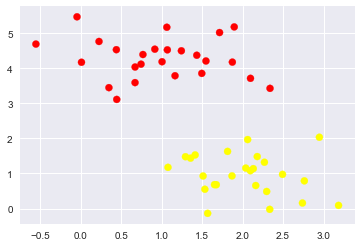

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

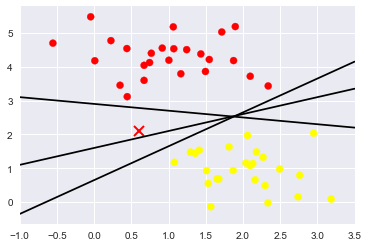

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

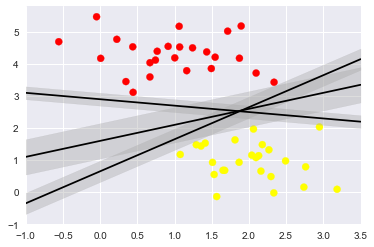

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In [5]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

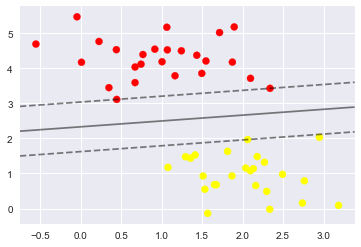

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

# Support Vectors List 

In [8]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

# Not linearly separable data

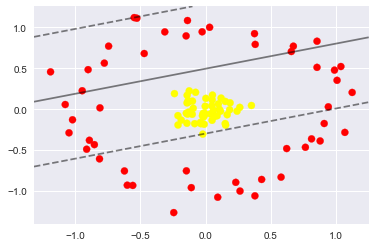

In [9]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

## Kernel Trick

In [11]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

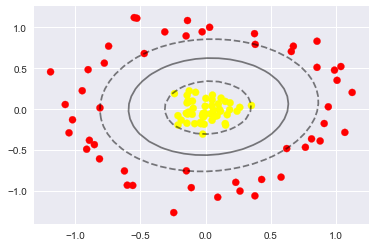

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

In [13]:
clf.support_vectors_

array([[-0.46939677,  0.6812259 ],
       [ 0.38018414,  0.79266374],
       [-0.14654188, -0.75326401],
       [ 0.62113154, -0.48074997],
       [-0.80816916,  0.01683619],
       [-0.02132184, -0.30409627],
       [ 0.35122602,  0.04568507]])

# Overlapping Data

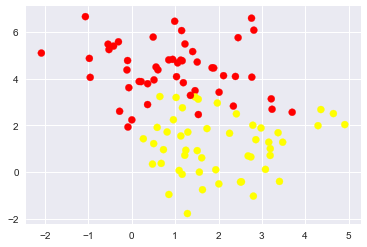

In [14]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

### Softening Margins (allows some points to invade margins)

#### For very large $C$, the margin is hard, and points cannot lie in it. For smaller $C$, the margin is softer, and can grow to encompass some points.

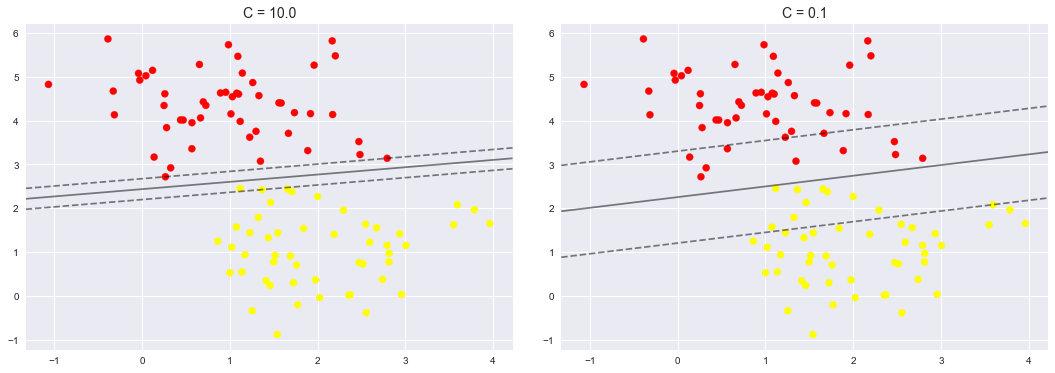

In [15]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)